In [1]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# 日志文件路径
log_path = '../scalars_seg.json'

In [3]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [4]:
eval(json_list[4])

{'lr': 0.0009959691449698113,
 'data_time': 0.004822301864624024,
 'loss': 0.9495220124721527,
 'decode.loss_ce': 0.5981660515069962,
 'decode.acc_seg': 81.6784896850586,
 'aux.loss_ce': 0.3513559564948082,
 'aux.acc_seg': 79.80795288085938,
 'time': 0.3094911575317383,
 'iter': 200,
 'memory': 6110,
 'step': 200}

In [23]:
df_train = list()
df_test = list()
for each in tqdm(json_list):
    if 'baseline' in each:
        continue
    elif 'mIoU' not in each:
        df_train.append(eval(each))
    else:
        df_test.append(eval(each))

df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

100%|██████████| 87/87 [00:00<00:00, 11011.00it/s]


In [24]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.001000,0.004573,2.514384,1.556522,46.935368,0.957862,46.748829,0.305452,23,13510,23
1,0.000999,0.004643,1.763597,1.104384,72.100739,0.659213,57.448006,0.307432,50,6109,50
2,0.000998,0.004691,1.422699,0.883129,87.232880,0.539570,54.026222,0.306715,100,6109,100
3,0.000997,0.004688,1.043236,0.649352,74.221130,0.393884,72.219757,0.307502,150,6109,150
4,0.000996,0.004822,0.949522,0.598166,81.678490,0.351356,79.807953,0.309491,200,6110,200
...,...,...,...,...,...,...,...,...,...,...,...
81,0.000918,0.004909,0.172235,0.109025,97.893738,0.063209,97.058746,0.312148,4050,10489,4050
82,0.000917,0.005166,0.163293,0.103855,96.809296,0.059437,96.199326,0.312975,4100,6109,4100
83,0.000916,0.004426,0.279302,0.174082,93.621735,0.105219,79.436203,0.311487,4150,6109,4150
84,0.000915,0.004567,0.161492,0.097781,94.787598,0.063711,95.202255,0.311681,4200,6109,4200


In [27]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,96.57,71.9,77.25,0.013193,0.72375,4000.0
1,0.10,0.2,0.30,0.400000,0.50000,0.6


In [30]:
# df_test增加一行
df_test.loc[1] = [0] * 6

# df_test排序
df_test = df_test.sort_values(by='mIoU', ascending=True)
df_test

,aAcc,mIoU,mAcc,data_time,time,step
1,0.00,0.0,0.00,0.000000,0.00000,0.0
0,96.57,71.9,77.25,0.013193,0.72375,4000.0


In [10]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [11]:
metrics = ['loss', 'decode.loss_ce', 'decode.acc_seg', 'aux.loss_ce', 'aux.acc_seg']

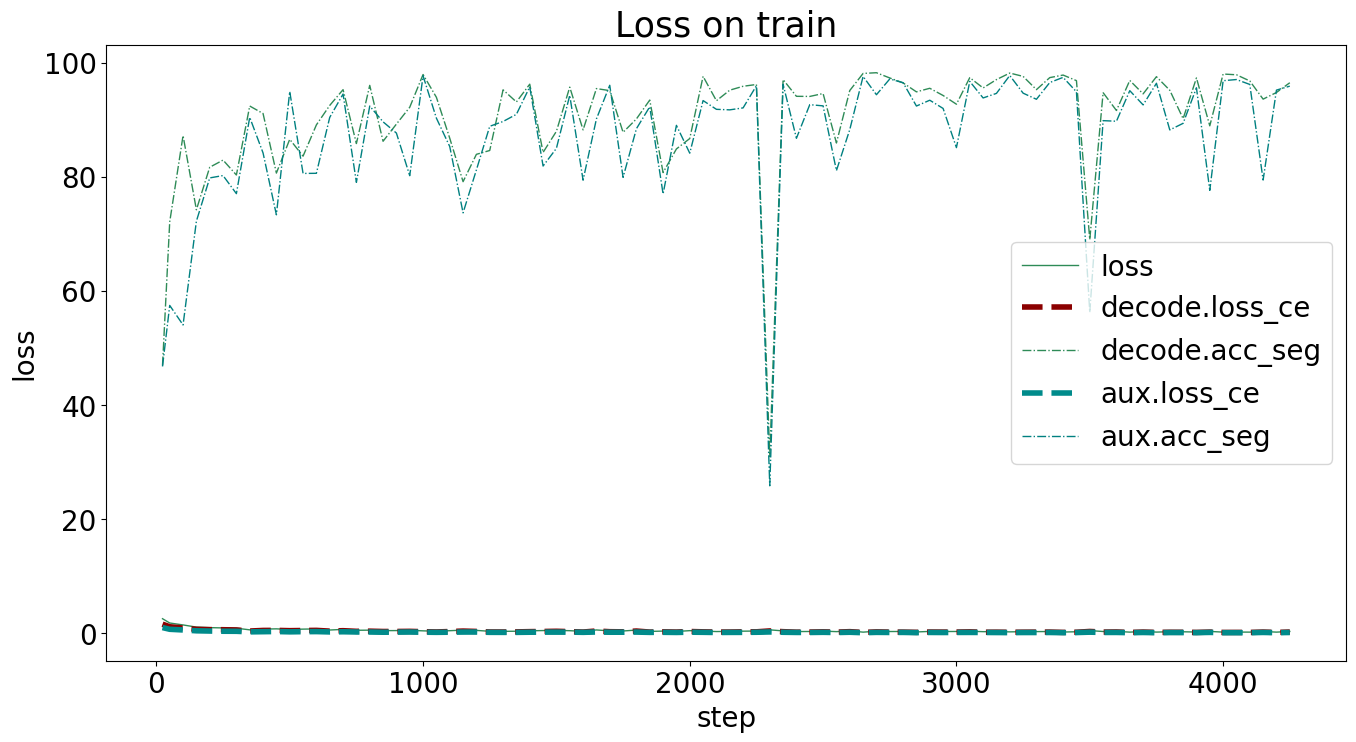

In [12]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('Loss on train', fontsize=25)
# plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [15]:
metrics = ['aAcc', 'mIoU', 'mAcc']

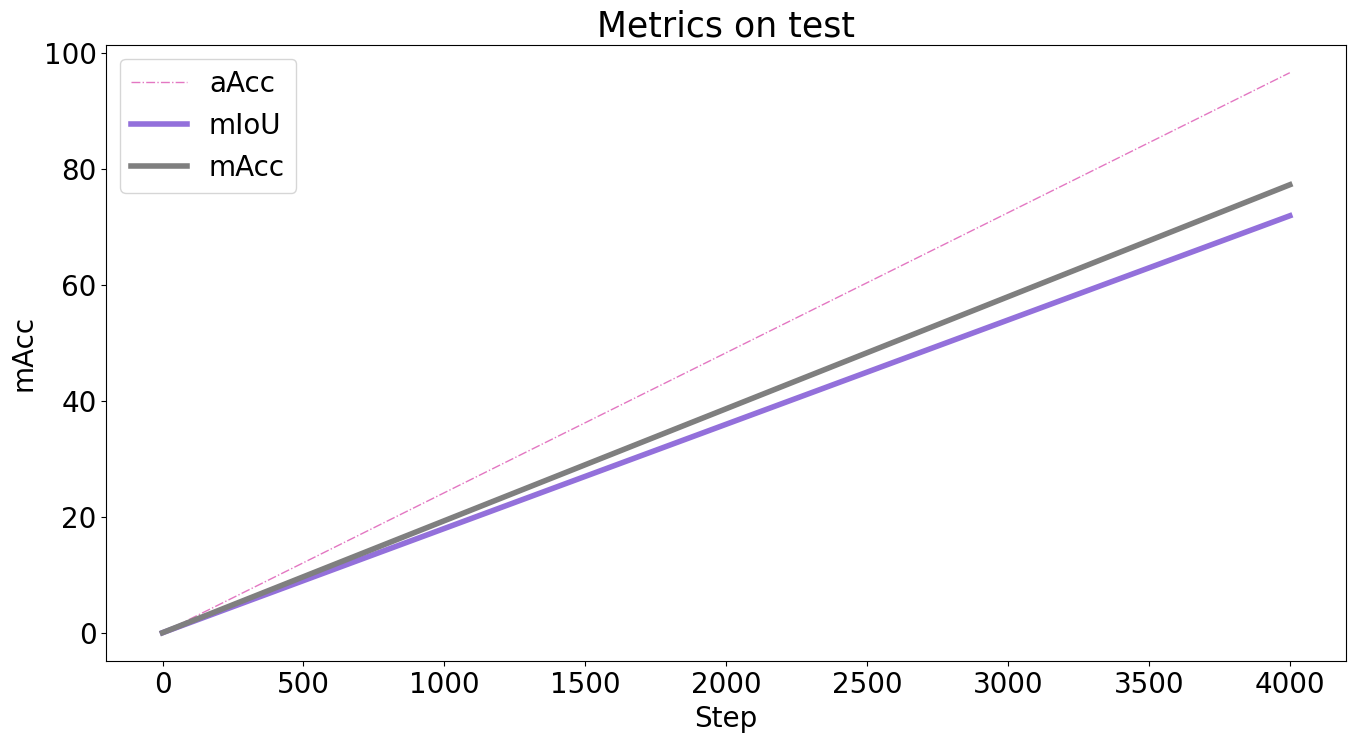

In [31]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('Metrics on test', fontsize=25)
# plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()